In [96]:
import pandas as pd
import pandas as pd
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling



## Business Understanding  

Using the data that was provided to us, we are trying to classify the y variable by minimizing the cost function: False Positives cost \\$10, False Negatives cost \\$500, True Positives cost \\$0 and True Negatives cost \\$0. We were given 50 variables and a target variable, and asked to use the variables to model the target variable. Thus, we are not sure why this problem is important, how to interpret the individual variables, and we bring no domain knowledge into this problem. The results below are purely the result of trends that are present in the dataset. 

Our assumptions are that the data, as provided to us, is either the entire population in question, or a random sample taken from the entire population in question. We assume that the cost function provided to us is correct, and that False Positives truly cost \\$10, False Negatives truly cost \\$500, True Positives truly cost \\$0 and True Negatives truly cost \\$0. 

## Data Evaluation / Engineering

Read the data in.

In [97]:
df = pd.read_csv("final_project.csv")
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


**The majority of the data is float64. We will take a deeper look at the variables, starting with the numeric variables.** 

In [98]:
df.dtypes

x0     float64
x1     float64
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7     float64
x8     float64
x9     float64
x10    float64
x11    float64
x12    float64
x13    float64
x14    float64
x15    float64
x16    float64
x17    float64
x18    float64
x19    float64
x20    float64
x21    float64
x22    float64
x23    float64
x24     object
x25    float64
x26    float64
x27    float64
x28    float64
x29     object
x30     object
x31    float64
x32     object
x33    float64
x34    float64
x35    float64
x36    float64
x37     object
x38    float64
x39    float64
x40    float64
x41    float64
x42    float64
x43    float64
x44    float64
x45    float64
x46    float64
x47    float64
x48    float64
x49    float64
y        int64
dtype: object

**There are between 20 and 50 NA's in each column.**

In [99]:
df.isna().sum()

x0     26
x1     25
x2     38
x3     37
x4     26
x5     37
x6     26
x7     27
x8     21
x9     30
x10    43
x11    30
x12    36
x13    31
x14    34
x15    35
x16    26
x17    27
x18    40
x19    35
x20    38
x21    29
x22    27
x23    47
x24    28
x25    22
x26    36
x27    30
x28    35
x29    30
x30    30
x31    39
x32    31
x33    41
x34    41
x35    30
x36    27
x37    23
x38    31
x39    23
x40    36
x41    40
x42    26
x43    37
x44    40
x45    29
x46    31
x47    37
x48    32
x49    32
y       0
dtype: int64

**If we were to drop all of the NA's, we would lose about 1% of the data. We can proceed with dropping NA's without fear of losing too much data.** 

In [100]:
print('Total Observations',len(dataset))
print('Number of observations left after removing N/A values',len(dataset.dropna()))
print('Percentage of data removed',len(dataset.dropna()) / len(dataset))

Total Observations 158392
Number of observations left after removing N/A values 158392
Percentage of data removed 1.0


**Looks like we have a variety of ranges for the rest of our numeric variables. All variables have a minimum in the negatives, while all variables have a maximum in the positives. y is a binary 0 or 1, as expected. It appears that all the numeric variables are cleaned, so we will move onto the 'object' columns.**

In [101]:
df_numeric = df.dropna()
df_numeric = df_numeric.drop(columns = ['x24', 'x29', 'x30', 'x32', 'x37'])
df_numeric.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
count,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,...,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000
mean,-0.000808,0.003705,-1.148314,-0.023012,-0.000266,0.013282,-1.669562,-7.697877,-0.028853,0.004320,...,6.706030,-1.832959,-0.002174,-0.007254,0.000996,-12.751993,0.028262,0.000160,-0.672052,0.401195
std,0.371064,6.340297,13.274738,8.066624,6.383306,7.672102,19.300472,30.541562,8.904048,6.354359,...,18.675642,5.110079,1.535282,4.163766,0.396604,36.608634,4.787974,1.935087,15.033134,0.490142
min,-1.592635,-26.278302,-59.394048,-33.864827,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000
25%,-0.251246,-4.259016,-10.166609,-5.453044,-4.313987,-5.152419,-14.781485,-27.315875,-6.034094,-4.260304,...,-5.802178,-5.159340,-1.039992,-2.814168,-0.266369,-36.432779,-3.216974,-1.320800,-10.929046,0.000000
50%,-0.001818,0.010023,-1.342199,-0.028470,-0.001138,0.015135,-1.951457,-6.959275,-0.016173,0.003098,...,6.847926,-1.922935,-0.004279,-0.012278,0.001841,-12.975088,0.036234,-0.011800,-0.569139,0.000000
75%,0.248622,4.286606,7.878130,5.448332,4.308644,5.191172,11.454209,12.215119,5.978646,4.303807,...,19.269855,1.452018,1.033870,2.781096,0.269194,11.445524,3.269134,1.318161,9.649839,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,100.050432,22.668041,6.680922,19.069759,1.669205,150.859415,20.836854,8.226552,66.877604,1.000000


**Our target varible 'y' is a collection of 0s and 1s. There is about a 40/60 split in the target variable.**

In [108]:
print(df_numeric['y'].unique())
print(df_numeric['y'].value_counts())
print(df_numeric['y'].value_counts() / df_numeric['y'].count())

[0 1]
0    94846
1    63546
Name: y, dtype: int64
0    0.598805
1    0.401195
Name: y, dtype: float64


**x24 is a column of what looks like continents, between europe, asia, america and nan. This is definitely not a numeric column that is being read in as a string, but we'll want to do some clean up to this column.** 

In [109]:
df['x24'].unique()

array(['euorpe', 'asia', 'america', nan], dtype=object)

**x29 needs to be cleaned. It is a column of months, where most months are 3 letters, but some are longer.**

In [11]:
df['x29'].unique()

array(['July', 'Aug', 'Jun', 'May', 'sept.', 'Apr', 'Nov', 'Oct', nan,
       'Mar', 'Feb', 'Dev', 'January'], dtype=object)

**x30 is a column of weekdays, monday through friday. Some days are misspelled. This column needs some cleaning.**

In [12]:
df['x30'].unique()

array(['tuesday', 'wednesday', 'thurday', 'monday', 'friday', nan],
      dtype=object)

**x32 is a column of percents that is being read in as str instead of numeric. This needs to be cleaned and turned into a numeric variable.**

In [13]:
df['x32'].unique()

array(['0.0%', '-0.02%', '-0.01%', '0.01%', '-0.03%', '0.02%', '-0.0%',
       '-0.04%', nan, '0.03%', '0.04%', '-0.05%', '0.05%'], dtype=object)

**x37 is a row of dollar values that were read in as str instead of numeric. This variable needs to be cleaned and turned into a numeric variable.** 

In [14]:
df['x37'].unique()

array(['$1313.96', '$1962.78', '$430.47', ..., '$1588.65', '$439.21',
       '$-1229.34'], dtype=object)

**Aside from dropping the NA's, it doesn't look like we need to do much cleaning with the variables that are already numeric. Thus, cleaning will focus on 'x24', 'x29', 'x30', 'x32' and 'x37'. First, we drop NA's.**

In [111]:
df_na = df.dropna()

**x24 has 'euorpe', 'asia' and 'america' as possible values. We will fix the spelling of europe and capitalize the first letter of each continent name.** 

In [112]:
df_na['x24'].unique()

array(['euorpe', 'asia', 'america'], dtype=object)

In [113]:
df_na['x24'] = df_na['x24'].str.replace('euorpe', 'Europe')
df_na['x24'] = df_na['x24'].str.replace('asia', 'Asia')
df_na['x24'] = df_na['x24'].str.replace('america', 'America')
df_na['x24'].unique()

array(['Europe', 'Asia', 'America'], dtype=object)

**We move on to the 'x29' variable, which has months in various forms. We will stick with the 3 letter form of each month, since most months are spelled that way. That means 'July', 'sept.', 'Dec' and 'January' need to be fixed.**

In [18]:
df_na['x29'].unique()

array(['July', 'Aug', 'Jun', 'May', 'sept.', 'Apr', 'Nov', 'Oct', 'Mar',
       'Feb', 'Dev', 'January'], dtype=object)

In [19]:
df_na['x29'] = df_na['x29'].str.replace('July', 'Jul')
df_na['x29'] = df_na['x29'].str.replace('sept.', 'Sep')
df_na['x29'] = df_na['x29'].str.replace('Dev', 'Dec')
df_na['x29'] = df_na['x29'].str.replace('January', 'Jan')
df_na['x29'].unique()

array(['Jul', 'Aug', 'Jun', 'May', 'Sep', 'Apr', 'Nov', 'Oct', 'Mar',
       'Feb', 'Dec', 'Jan'], dtype=object)

**Here, we look at the x30 variable, which seems to be days of the week. We'll capitalize like we had with the continents, and fix the spelling of 'thurday'.**

In [114]:
df_na['x30'].unique()

array(['tuesday', 'wednesday', 'thurday', 'monday', 'friday'],
      dtype=object)

In [115]:
df_na['x30'] = df_na['x30'].str.replace('tuesday', 'Tuesday')
df_na['x30'] = df_na['x30'].str.replace('wednesday', 'Wednesday')
df_na['x30'] = df_na['x30'].str.replace('thurday', 'Thursday')
df_na['x30'] = df_na['x30'].str.replace('monday', 'Monday')
df_na['x30'] = df_na['x30'].str.replace('friday', 'Friday')
df_na['x30'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Monday', 'Friday'],
      dtype=object)

**Here, we investigate the 'x32' variable. These are percents that still have % at the end, so pandas interprets them as strings. We will remove the % at the end, convert to numeric, and divide each value by 100 to convert percent to decimal. Note that the result only has 11 unique values instead of 12, as -0.0% and 0.0% were interpreted as two different values initially.**

In [22]:
df_na['x32'].unique()

array(['0.0%', '-0.02%', '-0.01%', '0.01%', '-0.03%', '0.02%', '-0.0%',
       '-0.04%', '0.03%', '0.04%', '-0.05%', '0.05%'], dtype=object)

In [23]:
df_na['x32'] = df_na['x32'].str.replace('%', '')
df_na['x32'] = df_na['x32'].astype('float64')
df_na['x32'] = df_na['x32'] / 100
df_na['x32'].unique()

array([ 0.    , -0.0002, -0.0001,  0.0001, -0.0003,  0.0002, -0.0004,
        0.0003,  0.0004, -0.0005,  0.0005])

**Finally, we have x37. This variable was interpreted as a string due to the leading dollar sign. We will remove this dollar sign and convert the result to numeric.** 

In [116]:
df_na['x37'].unique()

array(['$1313.96', '$1962.78', '$430.47', ..., '$1588.65', '$439.21',
       '$-1229.34'], dtype=object)

In [25]:
df_na['x37'] = df_na['x37'].str.replace('$', '').astype('float64').round(2)
df_na['x37'].unique()

array([ 1313.96,  1962.78,   430.47, ...,  1588.65,   439.21, -1229.34])

In [117]:
df_clean = df_na

**We have no NA's in our df_clean, and our variables are all numeric other than x24, x29 and x30, which is expected. We are ready to move forward with EDA and modelling.**

In [118]:
df_clean.isna().sum().sum()

0

In [119]:
df_clean.dtypes

x0     float64
x1     float64
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7     float64
x8     float64
x9     float64
x10    float64
x11    float64
x12    float64
x13    float64
x14    float64
x15    float64
x16    float64
x17    float64
x18    float64
x19    float64
x20    float64
x21    float64
x22    float64
x23    float64
x24     object
x25    float64
x26    float64
x27    float64
x28    float64
x29     object
x30     object
x31    float64
x32     object
x33    float64
x34    float64
x35    float64
x36    float64
x37     object
x38    float64
x39    float64
x40    float64
x41    float64
x42    float64
x43    float64
x44    float64
x45    float64
x46    float64
x47    float64
x48    float64
x49    float64
y        int64
dtype: object

### Variable Analysis

**Below, we create our Pandas Profiling html file. Because it is so large, it cannot be displayed in the Jupyter Notebook. Please see the supplemental FinalProjectEDA.html file.**

In [29]:
pandas_profiling = df_clean.profile_report()
pandas_profiling.to_file('FinalProjectEDA.html')

<b><u>Below are some important notes from our Exploratory Data Analysis</b></u>  

Missing Values: There are no missing values remaining in this dataset, due to the removal of NA's in the data cleanup section. 

Correlated Variables: x2 and x6 are highly correlated, x38 and x41 are highly correlated. When doing an analysis, we probably only need to keep one of x2 and x6, and one of x38 and x41 since they contain much of the same information, and including both would be redundent. 

Assumptions: It appears that all of the numeric variables are normally distributed. The df_index variable will not be used in our analysis. 

Sampling technique: We will address our sampling technique in our Model Building and Evaluation section. 

Balance of Target Variable: Our target variable, the y column, is split about 60/40 in favor of 0. We don't believe that this is enough of an imbalance for balancing to be necessary, so we will proceed with using the slightly off balance data that we currently have. 

Other Notes: Our categorical variables are not evenly distributed. For example, the vast majority of values in the x24 column are "Asia".

## Modeling Preparation:

Given that we have been tasked with a binary classification problem and there is an imbalanced cost  of $500 for false positive predictions an a $10 for incorrectly predicting a false negative we have decided to evaluate our baseline models using two primary metrics Recall and F1-score. If there were an equal cost for incorrect predicitons we may have used Accuracy but the F1-score is a good metric to use when avoiding false negatives and false positives is crucial. Since 
there is an overweight cost to predicting a false Positive Recall is the metric that we will primarily compare our candidate models becasue maximizing recall means that we should have the fewest number of false positives. The F1-score gives us a good idea how the models are performing overall eventhough we are trying to maximize recall we don't want to do it at the expense of predicting more false negatives which also have a cost.

* **Accuracy** - ratio of correctly predicted observation to the total observations. 

* **Precision** - ratio of correctly predicted positive observations to the total predicted positive observations.  

* **Recall** - ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label?  

* **F1 Score** - the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.  

Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

## Build and Compare Binary classification models

To aid us in finding the model with the best Recall and f1-score we will be using the **PyCaret** package. PyCaret is a powerful package allows us to compare different binary classification models to each other in a convient low code package. To train our baseline test models we will use 90% of our original cleaned data. The remaining 10% of the data that was held out will be use to score the final models.  


In [120]:
dataset = df_clean

**Split the data into 90% training data and 10% validation data**

In [121]:
data = dataset.sample(frac=0.90, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (142553, 51)
Unseen Data For Predictions: (15839, 51)


**Initialize Pycaret package**

The pycaret package will run through a setup opperation where we will specify our target value 'y' and confirm the setup looks correct before moving to the comparision step.

In [3]:
from pycaret.classification import *

In [4]:
%%time
exp_clf101 = setup(data = data, target = 'y', session_id=123)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(142553, 52)"
4,Missing Values,False
5,Numeric Features,48
6,Categorical Features,3
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


CPU times: user 1min 25s, sys: 14.9 s, total: 1min 40s
Wall time: 39min 41s


**After setup we will run the compare_models function(). This will run a 10 fold cross validation on each or our canidate models. In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data. The k results can then be averaged to produce a single estimation. In our case K=10 folds.**  

**The first time this process was run we did not exclude any models but the process took over an hour to run so to speed up debugging and use of this notebook we are excluding some of the models that took the most time to train but did not produce superior recall or F1 scores.**

**Based on the comparison we can see that decision tree based models seem to perform best on the data we have been given. The top too models CatBoost Classifier and Light Gradient Boosting Machine are boosted tree based models. Boosting means that each tree is dependent on prior trees. The algorithm learns by fitting the residual of the trees that preceded it. Thus, boosting in a decision tree ensemble tends to improve accuracy with some small risk of less coverage. Boosted models are really good at binary classification but because they are ensemble models meaning they consist of more than one model working together they can be difficult to interpret.**

In [76]:
%%time
best_model = compare_models(sort = 'Recall',
                              exclude = ['xgboost', 'gbc','ada','svm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.9327,0.9794,0.9063,0.9246,0.9154,0.8595,0.8596,17.0987
1,Light Gradient Boosting Machine,0.9082,0.9664,0.8648,0.9026,0.8833,0.8077,0.8083,2.5843
2,Extra Trees Classifier,0.9053,0.9682,0.8305,0.9261,0.8757,0.7996,0.8027,4.3189
3,Decision Tree Classifier,0.8394,0.8331,0.8011,0.7994,0.8003,0.6660,0.6660,7.3213
4,Random Forest Classifier,0.8819,0.9464,0.7853,0.9082,0.8423,0.7487,0.7538,1.6942
5,Quadratic Discriminant Analysis,0.7770,0.9050,0.6937,0.7842,0.6932,0.5379,0.5491,0.5436
6,Naive Bayes,0.7068,0.7692,0.5569,0.6599,0.6040,0.3738,0.3773,0.0942
7,Logistic Regression,0.6954,0.7394,0.5427,0.6431,0.5886,0.3495,0.3527,1.1431
8,Linear Discriminant Analysis,0.7016,0.7580,0.5095,0.6686,0.5783,0.3539,0.3617,1.0182
9,Ridge Classifier,0.7011,0.0000,0.5050,0.6695,0.5757,0.3519,0.3603,0.1442


CPU times: user 52min 6s, sys: 1min 31s, total: 53min 37s
Wall time: 9min 45s


In [10]:
%%time
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9305,0.9765,0.9059,0.9197,0.9128,0.8550,0.8550
1,0.9376,0.9815,0.9109,0.9321,0.9214,0.8696,0.8698
2,0.9295,0.9791,0.9019,0.9208,0.9113,0.8527,0.8529
3,0.9315,0.9787,0.9022,0.9253,0.9136,0.8568,0.8570
4,0.9344,0.9799,0.9102,0.9252,0.9176,0.8631,0.8631
5,0.9347,0.9785,0.9097,0.9263,0.9179,0.8637,0.8637
6,0.9290,0.9778,0.9007,0.9207,0.9106,0.8516,0.8518
7,0.9342,0.9805,0.9069,0.9275,0.9171,0.8625,0.8626
8,0.9351,0.9810,0.9134,0.9240,0.9187,0.8646,0.8647
9,0.9308,0.9801,0.9014,0.9245,0.9128,0.8555,0.8557


In [13]:
%%time
tuned_catBoost = tune_model(catboost, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9396,0.9813,0.9212,0.9279,0.9245,0.8741,0.8741
1,0.9464,0.9858,0.9222,0.9431,0.9325,0.8880,0.8882
2,0.9419,0.9840,0.9217,0.9328,0.9272,0.8788,0.8789
3,0.9413,0.9830,0.9174,0.9351,0.9262,0.8774,0.8776
4,0.9454,0.9849,0.9251,0.9380,0.9315,0.8861,0.8862
5,0.9434,0.9829,0.9216,0.9364,0.9289,0.8819,0.8820
6,0.9417,0.9833,0.9186,0.9350,0.9267,0.8783,0.8784
7,0.9414,0.9850,0.9211,0.9321,0.9266,0.8778,0.8778
8,0.9428,0.9849,0.9249,0.9321,0.9285,0.8808,0.8808
9,0.9425,0.9843,0.9181,0.9373,0.9276,0.8799,0.8800


CPU times: user 42min 27s, sys: 2min 18s, total: 44min 46s
Wall time: 12min 50s


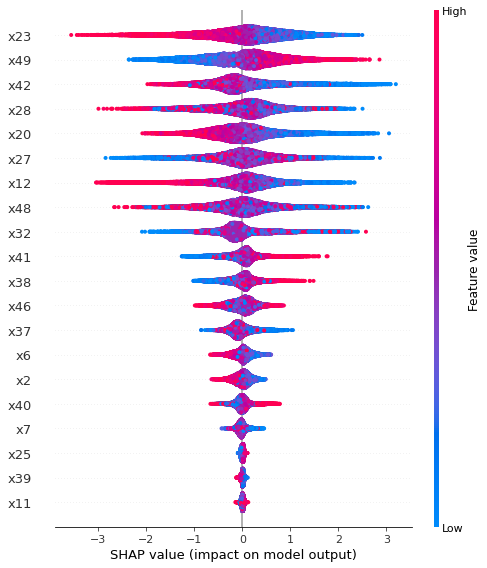

CPU times: user 54min 56s, sys: 14.7 s, total: 55min 10s
Wall time: 7min 47s


In [31]:
%%time
interpret_model(tuned_catBoost)

In [21]:
%%time
predictions = predict_model(tuned_catBoost, data = data_unseen)

CPU times: user 418 ms, sys: 36.1 ms, total: 454 ms
Wall time: 295 ms


In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

y_true = predictions['y']
y_pred = predictions['Label']
y_pred = pd.to_numeric(y_pred)

cf_matrix = confusion_matrix(y_true, y_pred)



In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)


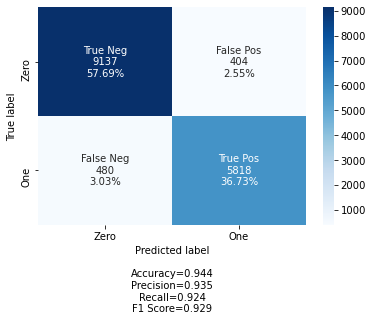

In [44]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories)

In [45]:
cf_matrix

array([[9137,  404],
       [ 480, 5818]])

In [71]:
def cost_func(cf):
    fp = cf[0,1]
    fn = cf[1,0]

    fp_cost = fp * 500
    fn_cost = fn * 10
    total_cost = fp_cost + fn_cost
    preds = np.sum(cf_matrix)
    cpp = round(total_cost/preds)

    print('Cost of False Positives','${:,}'.format(fp_cost))
    print('Cost of False Negatives','${:,}'.format(fn_cost))
    print('Total Cost of',preds,'prediction','${:,}'.format(total_cost))
    print('Cost per prediction','${:,}'.format(cpp))

In [72]:
cost_func(cf_matrix)

Cost of False Positives $202,000
Cost of False Negatives $4,800
Total Cost of 15839 prediction $206,800
Cost per prediction $13


In [56]:
np.sum(cf_matrix)

15839

In [70]:
13 * 15839

205907

In [75]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False
mlp,MLP Classifier,sklearn.neural_network.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model.RidgeClassifier,True


In [74]:
print(models)

<function models at 0x7f88d1dedd08>
